In [33]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
mpl.rcParams['font.family']='serif'
mpl.rcParams['font.size']=20
mpl.rcParams['text.usetex']=True

Let's start by doing some algebra with Kepler's 3rd law to see why we expect a line in log-log space, and what the slope and y-intercept should represent...

I'll use some basic laws of exponents: $\log_{10} (x^y) = y \log_{10} x$ and $\log_{10} (xy) = \log_{10} x + \log_{10} y$

$$P^2 \approx \frac{4\pi^2}{GM_J} a^3$$
$$\log_{10} (P^2) \approx \log_{10} \left( \frac{4\pi^2}{GM_J} a^3\right)$$
$$2 \log_{10}{P} \approx \log_{10} \left( \frac{4\pi^2}{GM_J}\right) + 3 \log_{10} a$$
$$\log_{10}{P} \approx \frac{3}{2} \log_{10} a + \frac{1}{2}\log_{10} \left( \frac{4\pi^2}{GM_J}\right)$$
$$\log_{10}{P} \approx \frac{3}{2} \log_{10} a + \log_{10} \left( \sqrt{\frac{4\pi^2}{GM_J}}\right)$$

If we consider that we are plotting $\log_{10}{P}$ vs. $\log_{10} a$ and the equation for a line with slope $m$ and y-intercept $b$: $y=mx+b$, it is clear that we expect the slope and y-intercepts of our line to be:
$$m=3/2$$ 
$$b=\log_{10} \left(\sqrt{\frac{4\pi^2}{GM_J}}\right)$$

Now let's do some plotting and fitting...

In [48]:
# Raw data from https://www.nasa.gov/wp-content/uploads/2009/12/moons_of_jupiter_lithograph.pdf
names = ['Io','Europa','Ganymede','Callisto']
a_km = np.array([422000,671000,1070000,1883000])
P_days = np.array([1.769, 3.551, 7.155, 16.689])

# Converting to cgs units
a_cm = a_km*1e5
P_s = P_days*24*3600

# Taking the log10 to create our points for plotting
x_arr, y_arr = np.log10(a_cm),np.log10(P_s)

In [59]:
# A simple function to define a line with slope m and y-intercept b
def line(x,m,b):
    return m*x+b

# Making a fit to that line using scipy and getting our optimized parameters m and b
m, b = curve_fit(line,x_arr,y_arr)[0]

# Let's look at our fit parameters!
print(f'm = {m}, b = {b}')

m = 1.5006285239648443, b = -10.760183009771893


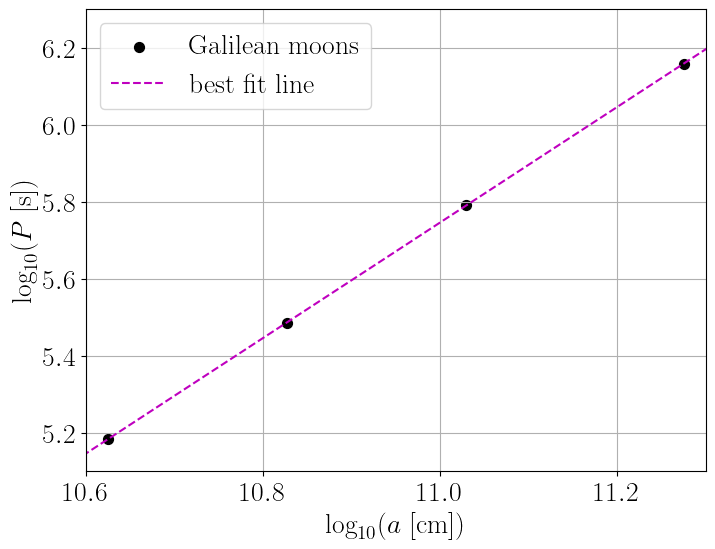

In [63]:
# Let's plot our data and the best fit line to make sure it all looks good
plt.figure(figsize=(8,6))
plt.grid()
plt.xlim((10.6,11.3))
plt.ylim((5.1,6.3))
plt.xlabel(r'$\log_{10} (a$ [cm])')
plt.ylabel(r'$\log_{10} (P$ [s])')
plt.scatter(x_arr,y_arr,marker='.',color='k',s=200,label='Galilean moons')
plt.plot(np.linspace(10,12), m*np.linspace(10,12) + b, ls='dashed',color='m',label='best fit line')
plt.legend()
plt.savefig('Galileanmoons_K3.png',dpi=200,bbox_inches='tight')

We can confirm that our best-fit slope of 1.5006 is very nearly exactly 3/2! To get the mass of Jupiter, we will use our y-intercept and solve for $M_J$
$$b=\log_{10} \left(\sqrt{\frac{4\pi^2}{GM_J}}\right)$$
$$10^b = \sqrt{\frac{4\pi^2}{GM_J}}$$
$$M_J = \frac{4\pi^2}{10^{2b}G} $$ 

In [62]:
G = 6.67430e-8
MJ = 4*(np.pi)**2/(G*10**(2*b))
ME = 5.97217e27 # from my constants website 
print(f'MJ = {MJ} g = {MJ/ME} M_E')

MJ = 1.9602886826312042e+30 g = 328.23725423609915 M_E


The true value given on the constants website is $1.9 \times 10^{30}$ g, while I calculated $1.96 \times 10^{30} g \approx 328 M_\oplus$, not bad!